# Kalman filtering

An introduction and demonstration of the **Kalman filter** (KF) [[Kalman, 1960](https://doi.org/10.1115/1.3662552), [Kalman and Bucy, 1961](https://doi.org/10.1115/1.3658902)] in its simplest form is given. This is the linear KF in discrete time. It is needless to say that there are many generalizations of the basic algorithm. They will not be covered in this notebook, but in a follow-up on non-linear filtering. The wider class of KF techniques has plenty of real-time applications, for example in data assimilation or sensor fusion.

## Introduction

The KF is a classical algorithm for recursive state estimation of dynamical systems. It combines knowledge about the physical process under consideration as well as a time series of related observations. That procedure tends to be more accurate than the separate analysis of physical models or data alone. Modeling errors and measurement noise are both reflected in the final estimates and their uncertainties.

Let us consider a **linear dynamical system** in discrete time. At a time step $k$, the state, control and observation vectors are denoted as $\boldsymbol{x}_k$, $\boldsymbol{u}_k$ and $\boldsymbol{y}_k$, respectively. The time evolution of the system, including observables, can be modeled by a state-transition and a measurement equation
$$
\begin{align*}
\boldsymbol{x}_k &=
\boldsymbol{F}_k \boldsymbol{x}_{k-1} +
\boldsymbol{G}_k \boldsymbol{u}_k + \boldsymbol{w}_k, \\
\boldsymbol{y}_k &=
\boldsymbol{H}_k \boldsymbol{x}_k + \boldsymbol{v}_k.
\end{align*}
$$
One often starts from the premise that the process noise $\boldsymbol{w}_k \sim \mathcal{N}(\boldsymbol{0}, \boldsymbol{Q}_k)$ follows a Gaussian distribution with zero mean $\mathbb{E}[\boldsymbol{w}_k] = \boldsymbol{0}$ and a covariance matrix $\mathrm{Cov}[\boldsymbol{w}_k] = \boldsymbol{Q}_k$. The measurement noise is similarly represented as $\boldsymbol{v}_k \sim \mathcal{N}(\boldsymbol{0}, \boldsymbol{R}_k)$ with $\mathbb{E}[\boldsymbol{v}_k] = \boldsymbol{0}$ and $\mathrm{Cov}[\boldsymbol{v}_k] = \boldsymbol{R}_k$.

Also the initial state $\boldsymbol{x}_0 \sim \mathcal{N}(\hat{\boldsymbol{x}}_{0|0}, \boldsymbol{P}_{0|0})$ is normally distributed with mean value $\mathbb{E}[\boldsymbol{x}_0] = \hat{\boldsymbol{x}}_{0|0}$ and covariance $\mathrm{Cov}[\boldsymbol{x}_0] = \boldsymbol{P}_{0|0}$. Another common modeling assumption is the mutual independence of the initial state and the noise vectors at different times.

The goal is to recursively compute state estimates $\hat{\boldsymbol{x}}_{k|k}$ and their covariances $\boldsymbol{P}_{k|k}$ at time instants $k$ given the current and all past observations. Kalman filtering proceeds in two alternating phases. In the **prediction step**, the last estimate $\hat{\boldsymbol{x}}_{k-1|k-1}$ and its covariance $\boldsymbol{P}_{k-1|k-1}$ at $k-1$ are propagated by
$$
\begin{align*}
\hat{\boldsymbol{x}}_{k|k-1} &=
\boldsymbol{F}_k \hat{\boldsymbol{x}}_{k-1|k-1} +
\boldsymbol{G}_k \boldsymbol{u}_k, \\
\boldsymbol{P}_{k|k-1} &=
\boldsymbol{F}_k \boldsymbol{P}_{k-1|k-1} \boldsymbol{F}_k^\top +
\boldsymbol{Q}_k.
\end{align*}
$$
So far, this involves the physics, but not yet the newest observation $\boldsymbol{y}_k$ at the current time step. The estimates at $k$ are therefore corrected in a subsequent **update step** so as to take the additional information into account. This analysis step can be written as
$$
\begin{align*}
\hat{\boldsymbol{x}}_{k|k} &=
\hat{\boldsymbol{x}}_{k|k-1} +
\boldsymbol{K}_k (\boldsymbol{y}_k - \boldsymbol{H}_k \hat{\boldsymbol{x}}_{k|k-1}), \\
\boldsymbol{P}_{k|k} &=
\left( \boldsymbol{I} - \boldsymbol{K}_k \boldsymbol{H}_k \right) \boldsymbol{P}_{k|k-1}.
\end{align*}
$$
Here, the matrix $\boldsymbol{K}_k = \boldsymbol{P}_{k|k-1} \boldsymbol{H}_k^\top \boldsymbol{S}_k^{-1}$ is referred to as the optimal **Kalman gain**. Moreover, $\boldsymbol{S}_k = \boldsymbol{H}_k \boldsymbol{P}_{k|k-1} \boldsymbol{H}_k^\top + \boldsymbol{R}_k$ is the covariance of the so-called **innovation** vector $\boldsymbol{y}_k - \boldsymbol{H}_k \hat{\boldsymbol{x}}_{k|k-1}$. The physical model and the data have eventually entered the analysis together.

A deeper understanding of the KF algorithm is closely associated with various ways of deriving its equations under different assumptions. Although this is not our primary concern at this point, we shortly outline an interesting perspective below.

## Bayesian filtering

A possible option to derive the Kalman equations is by adopting a Bayesian perspective on recursive estimation [[Särkkä, 2014](https://doi.org/10.1017/CBO9781139344203)]. This fully probabilistic formulation admits an additional and appealing interpretation of the linear KF as a Gaussian Bayes filter. In order to gain some further insights, we have a brief look into the topic. Let us start from the **probabilistic state-space** or continuous **hidden Markov model**
$$
\begin{align*}
\boldsymbol{X}_0 &\sim \pi(\boldsymbol{x}_0), \\
\boldsymbol{X}_k | \boldsymbol{x}_{k-1} &\sim
\pi(\boldsymbol{x}_k | \boldsymbol{x}_{k-1}), \quad k = 1, \ldots, T, \\
\boldsymbol{Y}_k | \boldsymbol{x}_k &\sim
\pi(\boldsymbol{y}_k | \boldsymbol{x}_k), \quad k = 0, \ldots, T.
\end{align*}
$$
The initial observation $\boldsymbol{y}_0$ is often omitted. It is assumed that $\pi(\boldsymbol{x}_k | \boldsymbol{x}_{0:k-1}, \boldsymbol{y}_{0:k-1}) = \pi(\boldsymbol{x}_k | \boldsymbol{x}_{k-1})$ and $\pi(\boldsymbol{y}_k | \boldsymbol{x}_{0:k}, \boldsymbol{y}_{0:k-1}) = \pi(\boldsymbol{y}_k | \boldsymbol{x}_k)$. Based on the Markov property of the dynamical states and the conditional independence of the measurements, one can write the joint probability distribution of all system states $\boldsymbol{x}_{0:T} = (\boldsymbol{x}_0, \ldots, \boldsymbol{x}_T)$ and observables $\boldsymbol{y}_{0:T} = (\boldsymbol{y}_0, \ldots, \boldsymbol{y}_T)$ as
$$
\pi(\boldsymbol{x}_{0:T}, \boldsymbol{y}_{0:T}) =
\pi(\boldsymbol{x}_0) \prod_{k=0}^T \pi(\boldsymbol{y}_k | \boldsymbol{x}_k)
\prod_{k=1}^T \pi(\boldsymbol{x}_k | \boldsymbol{x}_{k-1}).
$$

Via conditioning and marginalization, one can derive various distributions that are of relevance for state estimation problems. For **smoothing** one would be interested in the marginals of the joint posterior $\pi(\boldsymbol{x}_{0:T} | \boldsymbol{y}_{0:T})$ and for **prediction** in $\pi(\boldsymbol{x}_{T+1} | \boldsymbol{y}_{0:T})$ or even further in the future. The **filtering** problem is tackled by computing distributions of the form $\pi(\boldsymbol{x}_k | \boldsymbol{y}_{0:k})$, which can be achieved in alternating prediction and update steps
$$
\begin{align*}
\pi(\boldsymbol{x}_k | \boldsymbol{y}_{0:k-1}) &=
\int \pi(\boldsymbol{x}_k | \boldsymbol{x}_{k-1}) \,
\pi(\boldsymbol{x}_{k-1} | \boldsymbol{y}_{0:k-1}) \,
\mathrm{d} \boldsymbol{x}_{k-1}, \\
\pi(\boldsymbol{x}_k | \boldsymbol{y}_{0:k}) &=
\frac{\pi(\boldsymbol{y}_k | \boldsymbol{x}_k) \, \pi(\boldsymbol{x}_k |
\boldsymbol{y}_{0:k-1})}{\pi(\boldsymbol{y}_k | \boldsymbol{y}_{0:k-1})}.
\end{align*}
$$

It can be shown that the linear Gaussian case of Bayesian filtering gives rise to the KF as described previously. Provided that both the dynamical and the measurement model are linear with Gaussian errors, the overall model specification is
$$
\begin{align*}
\pi(\boldsymbol{x}_0) &=
\mathcal{N}(\boldsymbol{x}_0 | \hat{\boldsymbol{x}}_{0|0}, \boldsymbol{P}_{0|0}), \\
\pi(\boldsymbol{x}_k | \boldsymbol{x}_{k-1}) &=
\mathcal{N}(\boldsymbol{x}_k | \boldsymbol{F}_k \boldsymbol{x}_{k-1} +
\boldsymbol{G}_k \boldsymbol{u}_k, \boldsymbol{Q}_k), \\
\pi(\boldsymbol{y}_k | \boldsymbol{x}_k) &=
\mathcal{N}(\boldsymbol{y}_k | \boldsymbol{H}_k \boldsymbol{x}_k, \boldsymbol{R}_k).
\end{align*}
$$
The KF solves the Bayesian filtering equations exactly. This has to be understood in the sense that the classical prediction and update steps yield the mean vectors and covariance matrices of the Gaussian distributions
$$
\begin{align*}
\pi(\boldsymbol{x}_k | \boldsymbol{y}_{0:k-1}) &=
\mathcal{N}(\boldsymbol{x}_k | \hat{\boldsymbol{x}}_{k|k-1}, \boldsymbol{P}_{k|k-1}), \\
\pi(\boldsymbol{x}_k | \boldsymbol{y}_{0:k}) &=
\mathcal{N}(\boldsymbol{x}_k | \hat{\boldsymbol{x}}_{k|k}, \boldsymbol{P}_{k|k}).
\end{align*}
$$

## Discretization

A difficulty in Bayesian filtering is the specification of a process model in discrete time, especially the process noise. The discretization of a dynamical system in continuous time under stochastic noise is a common approach. It is referred to [[Särkkä and Solin, 2019](https://doi.org/10.1017/9781108186735)] for a more rigorous treatment of the subtleties of stochastic differential equations. We only discuss a relatively naive procedure to discretize a linear time-invariant **continuous-time** model
$$
\dot{\boldsymbol{x}}(t) =
\boldsymbol{A} \boldsymbol{x}(t) +
\boldsymbol{B} \boldsymbol{u}(t) +
\boldsymbol{\Gamma} \boldsymbol{w}(t).
$$
Here, $\boldsymbol{x}(t)$ and $\boldsymbol{u}(t)$ are the state and control variables, respectively and $\boldsymbol{w}(t)$ is a continuous-time Gaussian white noise process with $\mathbb{E}[\boldsymbol{w}(t)] = \boldsymbol{0}$ and $\mathbb{E}[\boldsymbol{w}(t) \boldsymbol{w}^\top(\tau)] = \boldsymbol{q} \delta(t-\tau)$. Such a matrix differential equation is formally solved by
$$
\boldsymbol{x}(t) = e^{\boldsymbol{A}(t-t_0)} \boldsymbol{x}(t_0) +
\int_{t_0}^t e^{\boldsymbol{A}(t-\tau)}
\boldsymbol{B} \boldsymbol{u}(\tau) \, \mathrm{d} \tau +
\int_{t_0}^t e^{\boldsymbol{A}(t-\tau)}
\boldsymbol{\Gamma} \, \mathrm{d} \boldsymbol{W}(\tau).
$$

In order to derive a **discrete-time** model, one usually proceeds on the assumption that the controls $\boldsymbol{u}(t) = \boldsymbol{u}_k$ are kept constant during a considered time interval with $t \in [(k-1) \Delta t, k \Delta t]$. This is called zero-order hold. Based on this, one obtains the (equivalent) discrete form
$$
\boldsymbol{x}_k = \boldsymbol{F} \boldsymbol{x}_{k-1} +
\boldsymbol{G} \boldsymbol{u}_k + \boldsymbol{w}_k,
$$
where
$$
\boldsymbol{F} = e^{\boldsymbol{A} \Delta t}, \quad
\boldsymbol{G} = \int_{0}^{\Delta t} e^{\boldsymbol{A} \tau}
\boldsymbol{B} \, \mathrm{d} \tau, \quad
\boldsymbol{w}_k = \int_{(k-1) \Delta t}^{k \Delta t} e^{\boldsymbol{A} (k \Delta t - \tau)}
\boldsymbol{\Gamma} \, \mathrm{d} \boldsymbol{W}(\tau).
$$
The last (Itô) integration over the stochastic driving process actually requires a more thorough mathematical treatment. We simply accept that the emerging discrete-time noise $\boldsymbol{w}_k \sim \mathcal{N}(\boldsymbol{0}, \boldsymbol{Q})$ is Gaussianly distributed with covariance matrix
$$
\boldsymbol{Q} = \int_{0}^{\Delta t}
e^{\boldsymbol{A} \tau} \boldsymbol{\Gamma} \boldsymbol{q}
\boldsymbol{\Gamma}^\top e^{\boldsymbol{A}^\top \tau} \, \mathrm{d} \tau.
$$

A small-$\Delta t$ approximation of the matrix exponential is $\boldsymbol{F} = e^{\boldsymbol{A} \Delta t} = \sum_{k=0}^\infty \frac{1}{k!} (\boldsymbol{A} \Delta t)^k \approx \boldsymbol{I} + \boldsymbol{A} \Delta t$. If one has $\boldsymbol{A}^2 = \boldsymbol{0}$, which is indeed the case for some models, this is actually exact. Similar approximations can be used for $\boldsymbol{G}$ and $\boldsymbol{Q}$. For example, $\boldsymbol{G} = \int_{0}^{\Delta t} e^{\boldsymbol{A} \tau} \boldsymbol{B} \, \mathrm{d} \tau = \sum_{k=1}^\infty \frac{1}{k!} \boldsymbol{A}^{k-1} (\Delta t)^k \boldsymbol{B} \approx \boldsymbol{B} \Delta t$.

It is noted that, instead of discretizing an exact solution of the continuous linear system $\dot{\boldsymbol{x}} = \boldsymbol{A} \boldsymbol{x}$, one can discretize the equations directly based on finite differencing or a first-order Taylor expansion. The **Euler method** $\boldsymbol{x}_k \approx \boldsymbol{x}_{k-1} + \boldsymbol{A} \Delta t \boldsymbol{x}_{k-1}$ for numerically solving ordinary differential equations straightforwardly arises that way. Of course, there are many extensions to this basic scheme.

A stochastic differential equation $\mathrm{d} \boldsymbol{x} = \boldsymbol{A} \boldsymbol{x} \, \mathrm{d} t + \boldsymbol{\Gamma} \, \mathrm{d} \boldsymbol{W}$, which is just short for $\boldsymbol{x}(t) - \boldsymbol{x}(t_0) = \int_{t_0}^t \boldsymbol{A} \boldsymbol{x}(\tau) \, \mathrm{d} \tau + \int_{t_0}^t \boldsymbol{\Gamma} \, \mathrm{d} \boldsymbol{W}(\tau)$, can be easily simulated with the **Euler-Maruyama method** $\boldsymbol{x}_k \approx \boldsymbol{x}_{k-1} + \boldsymbol{A} \Delta t \boldsymbol{x}_{k-1} + \boldsymbol{\Gamma} \Delta \boldsymbol{W}_{k-1}$. The Wiener process increment $\Delta \boldsymbol{W}_{k-1} \sim \mathcal{N}(\boldsymbol{0}, \boldsymbol{q} \Delta t)$ is a zero-mean Gaussian whose (co)variance scales with $\Delta t$. Such a simulation scheme can be also employed in the non-linear case $\mathrm{d} \boldsymbol{x} = f(\boldsymbol{x}, t) \, \mathrm{d} t + \boldsymbol{\Gamma}(\boldsymbol{x}, t) \, \mathrm{d} \boldsymbol{W}$.

## Demonstration

We now conduct a synthetic experiment in order the demonstrate the KF algorithm. A simple object tracking problem as it could be encountered in vehicle collision avoidance is considered. While the evolution of a hypothetical system is simulated, data are generated at each time step. Simultaneously, the system is state-estimated with a KF. The implementation focuses on simplicity and clarity of exposition rather than numerical efficiency or stability.

In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

Widespread motion models can be directly constructed in discrete time or indirectly derived based on the time-discretization of a continuous system [[Bar‐Shalom et al., 2001](https://doi.org/10.1002/0471221279)]. We follow the latter approach. Let us therefore consider an accelerated point mass particle moving according to $\ddot{x} = a = F/m$ in one dimension. The state-space representation in continuous time with states $\boldsymbol{x} = (x_1, x_2)^\top = (x, \dot{x})^\top$ is
$$
\underbrace{\begin{pmatrix} \dot{x}_1 \\ \dot{x}_2 \end{pmatrix}}_\dot{\boldsymbol{x}} =
\underbrace{\begin{pmatrix} 0 & 1 \\ 0 & 0 \end{pmatrix}}_\boldsymbol{A}
\underbrace{\begin{pmatrix} x_1 \\ x_2 \end{pmatrix}}_\boldsymbol{x} +
\underbrace{\begin{pmatrix} 0 \\ 1 \end{pmatrix}}_\boldsymbol{\Gamma}
\underbrace{a}_w.
$$

A particle at constant velocity is described by $\ddot{x} = 0$. The **white noise acceleration** or **nearly constant velocity** model $\ddot{x} = w(t)$ anticipates disturbances causing small velocity changes. Here, $w(t)$ is a continuous-time Gaussian white noise process with $\mathbb{E}[w(t)] = 0$ and $\mathbb{E}[w(t) w(\tau)] = \sigma_w^2 \delta(t-\tau)$. The velocity is then a Wiener process, the integral of Gaussian white noise. One can derive the discretized state equation
$$
\underbrace{\begin{pmatrix} x_{1,k} \\ x_{2,k} \end{pmatrix}}_{\boldsymbol{x}_k} =
\underbrace{\begin{pmatrix} 1 & \Delta t \\ 0 & 1 \end{pmatrix}}_\boldsymbol{F}
\underbrace{\begin{pmatrix} x_{1,k-1} \\ x_{2,k-1} \end{pmatrix}}_{\boldsymbol{x}_{k-1}} +
\underbrace{\begin{pmatrix} w_{1,k} \\ w_{2,k} \end{pmatrix}}_{\boldsymbol{w}_k}.
$$
In this connection, system state transitions are subject to discrete-time Gaussian noise $\boldsymbol{w}_k = (w_{1,k}, w_{2,k})^\top \sim \mathcal{N}(\boldsymbol{0},\boldsymbol{Q})$. The process noise has zero mean and the following covariance matrix
$$
\boldsymbol{Q} = \sigma_w^2
\begin{pmatrix}
\frac{1}{3} (\Delta t)^3 & \frac{1}{2} (\Delta t)^2 \\
\frac{1}{2} (\Delta t)^2 & \Delta t
\end{pmatrix}.
$$
This quantifies the variation of the state variables over the time interval $\Delta t$. One observes that $\sigma_w^2 \Delta t$ is the variance of random velocity changes during a single time step, which may assist in the selection of a realistic value of the intensity $\sigma_w$ characterizing the process noise.

A common model emerges if one assumes that **only positions** $x_{1,k}$ can be observed. Though, the actual recorded values $y_k = x_{1,k} + v_k$ contain statistical noise $v_k \sim \mathcal{N}(0, \sigma_v^2)$ with variance $\sigma_v^2$. The corresponding measurement model can be written as
$$
y_k = \underbrace{\begin{pmatrix} 1 & 0 \end{pmatrix}}_\boldsymbol{H}
\begin{pmatrix} x_{1,k} \\ x_{2,k} \end{pmatrix} + v_k, \quad
v_k \sim \mathcal{N}(0, \underbrace{\sigma_v^2}_R).
$$
Another scenario is that both **positions and velocities** $\boldsymbol{x}_k = (x_{1,k}, x_{2,k})^\top$ are observable. The actual measurements $\boldsymbol{y}_k = (y_{1,k}, y_{2,k})^\top = \boldsymbol{x}_k + \boldsymbol{v}_k$ are subject to independent Gaussian noise $\boldsymbol{v}_k = (v_{1,k}, v_{2,k})^\top$ with variances $\sigma_{v,1}^2 $ and $\sigma_{v,2}^2$. This can be represented as
$$
\boldsymbol{y}_k = \underbrace{\begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix}}_\boldsymbol{H}
\begin{pmatrix} x_{1,k} \\ x_{2,k} \end{pmatrix} + \boldsymbol{v}_k, \quad
\boldsymbol{v}_k \sim \mathcal{N} \Bigg( \begin{pmatrix} 0 \\ 0 \end{pmatrix},
\underbrace{\begin{pmatrix} \sigma_{v,1}^2 & 0 \\ 0 & \sigma_{v,2}^2 \end{pmatrix}}_\boldsymbol{R} \Bigg).
$$

Eventually, we have specified all components of the system's process and measurement models. For the sake of completeness, we again summarize the final state-space model in discrete time
$$
\begin{align*}
\boldsymbol{x}_k &= \boldsymbol{F} \boldsymbol{x}_{k-1} + \boldsymbol{w}_k, \quad
\boldsymbol{w}_k \sim \mathcal{N}(\boldsymbol{0}, \boldsymbol{Q}), \\
\boldsymbol{y}_k &= \boldsymbol{H} \boldsymbol{x}_k + \boldsymbol{v}_k, \quad
\boldsymbol{v}_k \sim \mathcal{N}(\boldsymbol{0}, \boldsymbol{R}).
\end{align*}
$$

### System definitions

We start by defining a function that constructs the discrete-time matrices of the system above. It takes the time step size, the process noise intensity and the measurement noise level as input arguments. The two cases with position measurements only and measurements of both positions and velocities are covered. Thereafter, the system simulator and KF algorithm are realized as classes. They can be initialized with the system matrices.

In [3]:
def create_matrices(dt, sigma_w, sigma_v):
    '''Create discrete-time matrices.'''
    dt = abs(dt)
    F = np.array([[1., dt],
                  [0, 1.]])
    Q = np.array([[(dt**3)/3, (dt**2)/2],
                  [(dt**2)/2, dt]]) * sigma_w**2
    sigma_v = np.asarray(sigma_v).ravel().squeeze().astype('float')
    if sigma_v.size == 1:
        H = np.array([[1., 0.]])
        R = sigma_v**2
    elif sigma_v.size == 2:
        H = np.eye(2)
        R = np.diag(sigma_v**2)
    elif sigma_v.size == 4:
        H = np.eye(2)
        R = np.reshape(sigma_v, (2,2))
    return F, H, Q, R

In [4]:
class RealSystem():
    '''Simulator of the hypothetical system.'''

    def __init__(self, F, H, Q, R, x0=None):
        self.F = np.asarray(F)
        self.H = np.asarray(H)
        self.process_noise = multivariate_normal(cov=Q)
        self.measure_noise = multivariate_normal(cov=R)
        if x0 is None:
            self.x = np.zeros((self.F.shape[0],1))
        else:
            self.x = np.array(x0).reshape((-1,1)).astype('float')

    def evolve(self):
        self.x = np.dot(self.F, self.x)
        self.x += self.process_noise.rvs().reshape(self.x.shape)

    def observe(self):
        y_meas = np.dot(self.H, self.x)
        y_meas += self.measure_noise.rvs().reshape(y_meas.shape)
        return y_meas.squeeze()

    def get_state(self):
        return self.x.squeeze()

In [5]:
class KalmanFilter():
    '''Naive Kalman filter implementation.'''

    def __init__(self, F, H, Q, R, x0=None, P0=None):
        self.F = np.asarray(F)
        self.H = np.asarray(H)
        self.Q = np.asarray(Q)
        self.R = np.asarray(R)
        if x0 is None:
            self.x = np.zeros((self.F.shape[0],1))
        else:
            self.x = np.array(x0).reshape((-1,1)).astype('float')
        if P0 is None:
            self.P = np.eye(self.F.shape[0])
        else:
            self.P = np.array(P0).reshape(self.F.shape).astype('float')

    def predict(self):
        self.x = np.dot(self.F, self.x)
        self.P = self.F.dot(self.P).dot(self.F.T) + self.Q

    def update(self, y):
        y = np.asarray(y).reshape((-1,1))
        S = self.H.dot(self.P).dot(self.H.T) + self.R
        K = self.P.dot(self.H.T).dot(np.linalg.inv(S))
        self.x = self.x + K.dot(y - self.H.dot(self.x))
        self.P = (np.eye(self.P.shape[0]) - K.dot(self.H)).dot(self.P)

    def get_state(self):
        return self.x.squeeze(), self.P

### Position measurements only

It is time to further concretize the system by setting its parameters to specific values. The simulator and KF are then instantiated accordingly. After being initialized, the stochastic simulator evolves the system in time and generates observations of the position, while the KF algorithm sequentially estimates all state variables, both position and velocity, in real-time.

In [6]:
dt = 0.1 # time step
sigma_w = 2 # process noise intensity
sigma_v = 3 # measurement noise level
x0 = (0, 5) # initial state
F, H, Q, R = create_matrices(dt, sigma_w, sigma_v)
real_system = RealSystem(F, H, Q, R, x0)
kalman_filter = KalmanFilter(F, H, Q, R, x0)

In [7]:
no_steps = 100
x_true = np.zeros((no_steps+1,2))
y_meas = np.zeros(no_steps)
x_hat = np.zeros((no_steps,2))
P_hat = np.zeros((no_steps,2,2))
x_true[0] = real_system.get_state()
for k in range(no_steps):
    real_system.evolve()
    x_true[k+1] = real_system.get_state()
    y_meas[k] = real_system.observe()
    kalman_filter.predict()
    kalman_filter.update(y_meas[k])
    x_hat[k], P_hat[k] = kalman_filter.get_state()

<IPython.core.display.Javascript object>


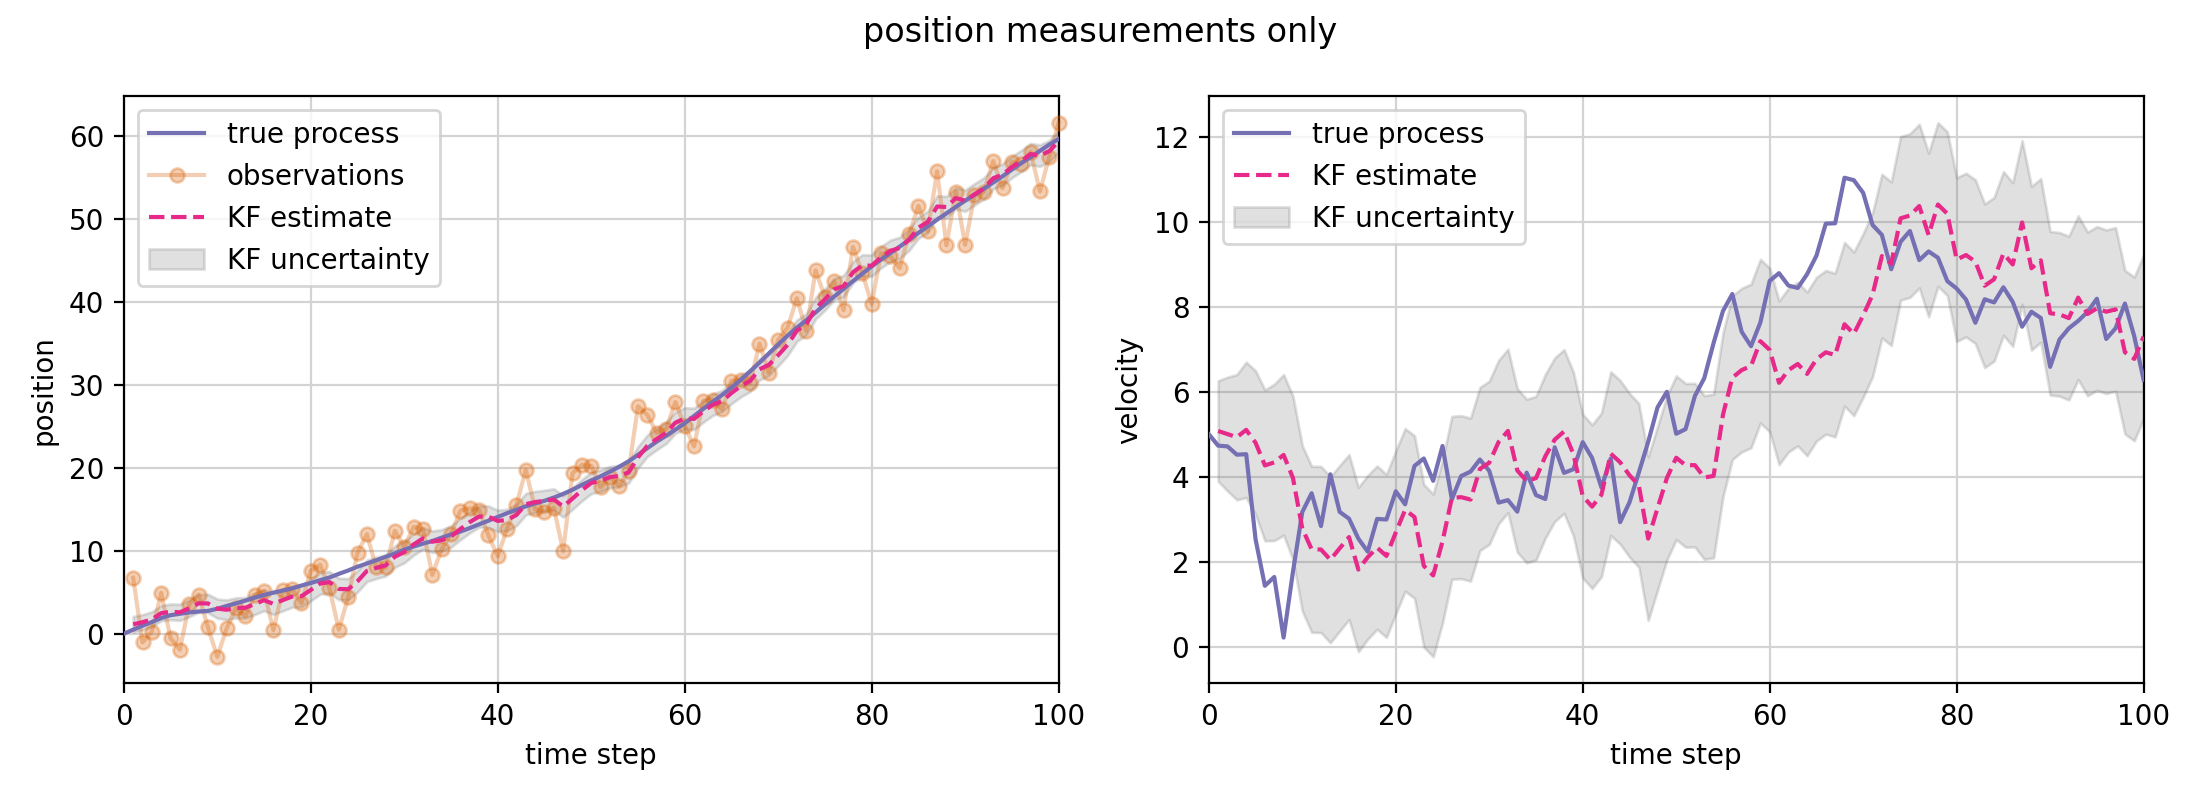

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(11,4))
axes[0].plot(np.arange(no_steps+1), x_true[:,0], color=plt.cm.Dark2(2), zorder=4, label='true process')
axes[0].plot(np.arange(1,no_steps+1), y_meas, marker='o', markersize=5,
             color=plt.cm.Dark2(1), alpha=0.3, clip_on=False, zorder=3, label='observations')
axes[0].plot(np.arange(1,no_steps+1), x_hat[:,0], linestyle='--',
             color=plt.cm.Dark2(3), zorder=5, label='KF estimate')
axes[0].fill_between(np.arange(1,no_steps+1), x_hat[:,0]-np.sqrt(P_hat[:,0,0]), x_hat[:,0]+np.sqrt(P_hat[:,0,0]),
                     color=plt.cm.Dark2(7), alpha=0.2, zorder=2, label='KF uncertainty')
axes[0].set(xlabel='time step', ylabel='position', xlim=(0,no_steps))
axes[1].plot(np.arange(no_steps+1), x_true[:,1], color=plt.cm.Dark2(2), zorder=4, label='true process')
axes[1].plot(np.arange(1,no_steps+1), x_hat[:,1], linestyle='--',
             color=plt.cm.Dark2(3), zorder=5, label='KF estimate')
axes[1].fill_between(np.arange(1,no_steps+1), x_hat[:,1]-np.sqrt(P_hat[:,1,1]), x_hat[:,1]+np.sqrt(P_hat[:,1,1]),
                     color=plt.cm.Dark2(7), alpha=0.2, zorder=2, label='KF uncertainty')
axes[1].set(xlabel='time step', ylabel='velocity', xlim=(0,no_steps))
for ax in axes.ravel().tolist():
    ax.legend()
    ax.grid(b=True, which='both', color='lightgray', linestyle='-')
    ax.set_axisbelow(True)
fig.suptitle('position measurements only')
fig.tight_layout()
fig.show()

### Position and velocity measurements

In a second experiment we investigate the case that positions and velocities can be directly observed. Of course, they are still subjected to measurement errors. In comparison to the observation model defined before, there is an additional variable which has to be treated. Other than that, the considered system is identical to the one used in the first experiment.

In [9]:
dt = 0.1 # time step
sigma_w = 2 # process noise intensity
sigma_v = (3, 1.5) # measurement noise levels
x0 = (0, 5) # initial state
F, H, Q, R = create_matrices(dt, sigma_w, sigma_v)
real_system = RealSystem(F, H, Q, R, x0)
kalman_filter = KalmanFilter(F, H, Q, R, x0)

In [10]:
no_steps = 100
x_true = np.zeros((no_steps+1,2))
y_meas = np.zeros((no_steps,2))
x_hat = np.zeros((no_steps,2))
P_hat = np.zeros((no_steps,2,2))
x_true[0] = real_system.get_state()
for k in range(no_steps):
    real_system.evolve()
    x_true[k+1] = real_system.get_state()
    y_meas[k] = real_system.observe()
    kalman_filter.predict()
    kalman_filter.update(y_meas[k])
    x_hat[k], P_hat[k] = kalman_filter.get_state()

<IPython.core.display.Javascript object>


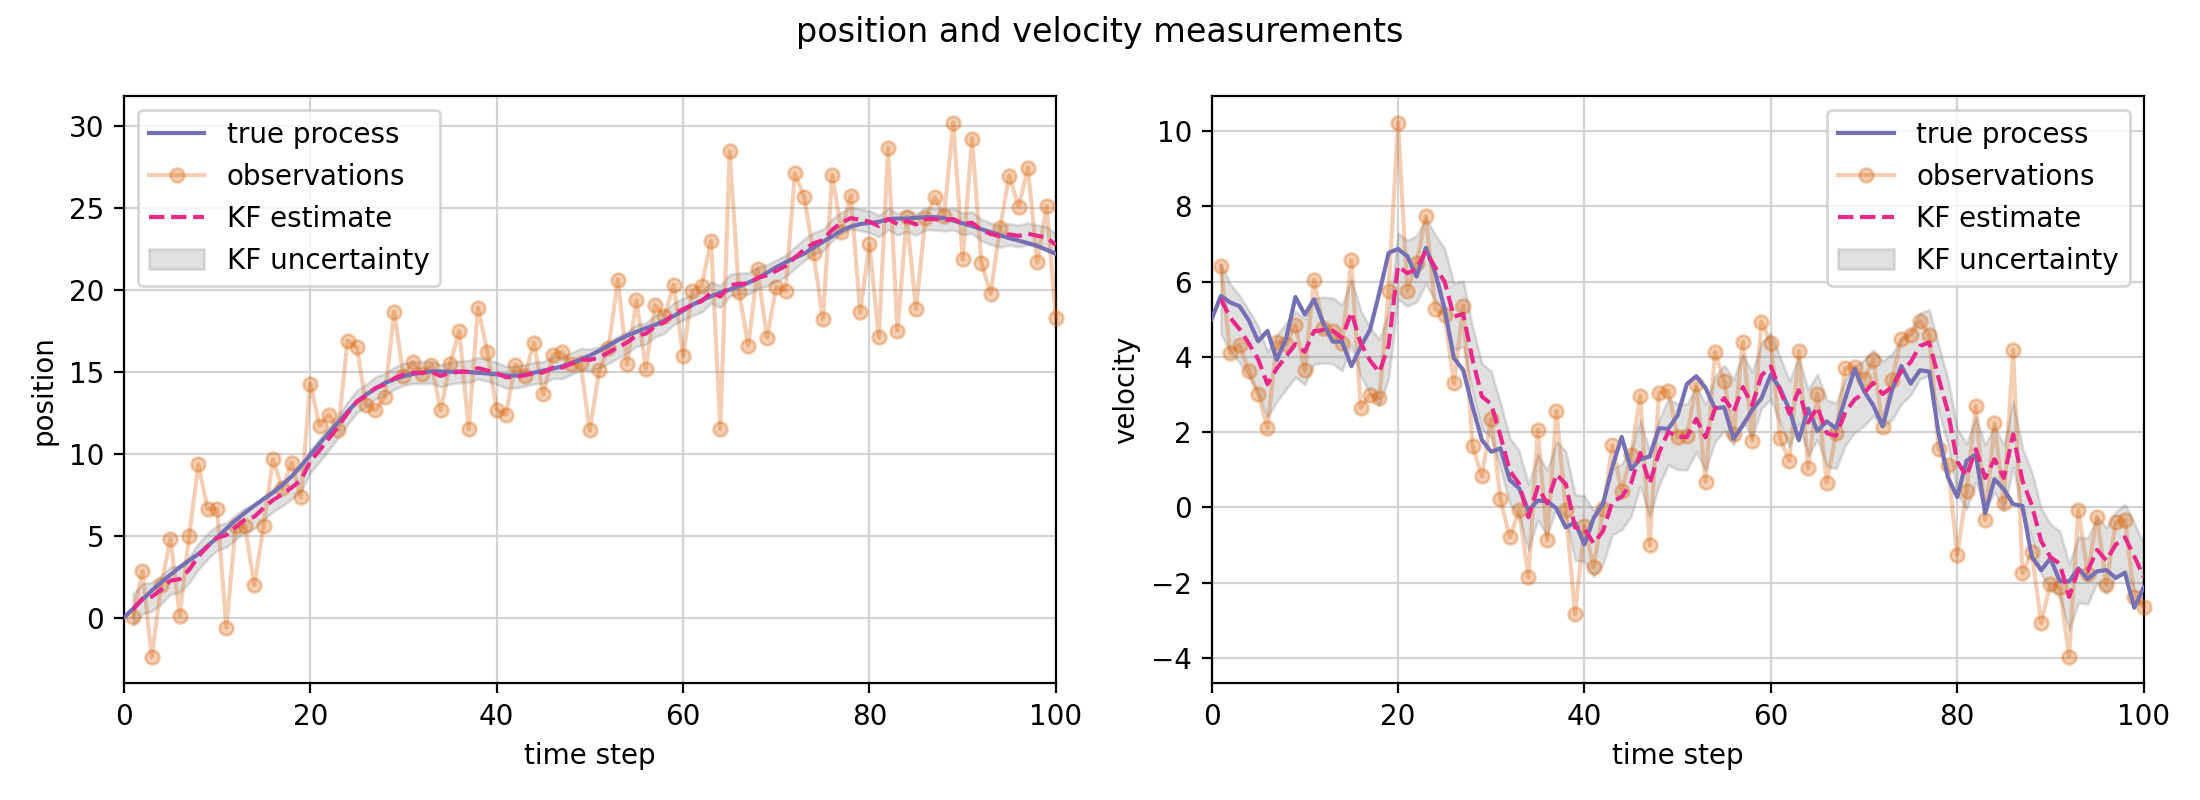

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(11,4))
axes[0].plot(np.arange(no_steps+1), x_true[:,0], color=plt.cm.Dark2(2), zorder=4, label='true process')
axes[0].plot(np.arange(1,no_steps+1), y_meas[:,0], marker='o', markersize=5,
             color=plt.cm.Dark2(1), alpha=0.3, clip_on=False, zorder=3, label='observations')
axes[0].plot(np.arange(1,no_steps+1), x_hat[:,0], linestyle='--',
             color=plt.cm.Dark2(3), zorder=5, label='KF estimate')
axes[0].fill_between(np.arange(1,no_steps+1), x_hat[:,0]-np.sqrt(P_hat[:,0,0]), x_hat[:,0]+np.sqrt(P_hat[:,0,0]),
                     color=plt.cm.Dark2(7), alpha=0.2, zorder=2, label='KF uncertainty')
axes[0].set(xlabel='time step', ylabel='position', xlim=(0,no_steps))
axes[1].plot(np.arange(no_steps+1), x_true[:,1], color=plt.cm.Dark2(2), zorder=4, label='true process')
axes[1].plot(np.arange(1,no_steps+1), y_meas[:,1], marker='o', markersize=5,
             color=plt.cm.Dark2(1), alpha=0.3, clip_on=False, zorder=3, label='observations')
axes[1].plot(np.arange(1,no_steps+1), x_hat[:,1], linestyle='--',
             color=plt.cm.Dark2(3), zorder=5, label='KF estimate')
axes[1].fill_between(np.arange(1,no_steps+1), x_hat[:,1]-np.sqrt(P_hat[:,1,1]), x_hat[:,1]+np.sqrt(P_hat[:,1,1]),
                     color=plt.cm.Dark2(7), alpha=0.2, zorder=2, label='KF uncertainty')
axes[1].set(xlabel='time step', ylabel='velocity', xlim=(0,no_steps))
for ax in axes.ravel().tolist():
    ax.legend()
    ax.grid(b=True, which='both', color='lightgray', linestyle='-')
    ax.set_axisbelow(True)
fig.suptitle('position and velocity measurements')
fig.tight_layout()
fig.show()